In [1]:
import ltfatpy
import scipy as sc
import numpy as np
import librosa 

In [2]:
L = 2**12

signal, fs = ltfatpy.signals.gspi.gspi()
signal, fs = ltfatpy.signals.greasy.greasy()
print(signal.shape)
signal = signal[:L]


(5880,)


In [3]:
import IPython.display
from IPython.display import Audio
print(fs)
display(Audio(signal, rate=fs))

16000


In [4]:
import matplotlib
import matplotlib.pyplot as plt

font = {'family' : 'Times new roman',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rcParams['image.cmap'] =  'inferno'


findfont: Font family ['Times new roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times new roman'] not found. Falling back to DejaVu Sans.


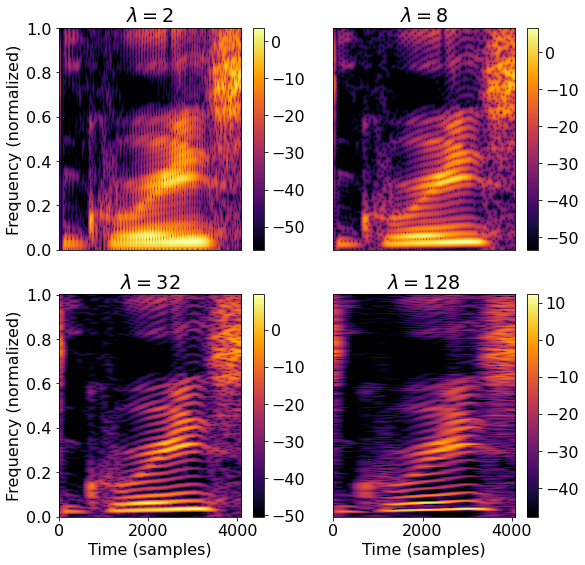

In [5]:
M = 1024
a = 8


dgt_lambda_2 = ltfatpy.dgtreal(signal, {'name': 'gauss', 'tfr': a*M/4/L}, int(a/2), int(M/2))[0]
dgt_lambda_8 = ltfatpy.dgtreal(signal, {'name': 'gauss', 'tfr': a*M/L}, a, M)[0]
dgt_lambda_32 = ltfatpy.dgtreal(signal, {'name': 'gauss', 'tfr': a*M*4/L}, a*2, M*2)[0]
dgt_lambda_128 = ltfatpy.dgtreal(signal, {'name': 'gauss', 'tfr': a*M*16/L}, a*4, M*4)[0]


plt.figure(figsize=(9,9));
plt.subplot(221);
ltfatpy.plotdgtreal(dgt_lambda_2, a/2, M/2, dynrange=60);
plt.tick_params(
    axis='x',         
    which='both',   
    bottom=False,
    labelbottom=False)
plt.xlabel('')
plt.title('$\lambda = 2$')

plt.subplot(222);
ltfatpy.plotdgtreal(dgt_lambda_8, a, M, dynrange=60);
plt.tick_params(
    axis='both',         
    which='both',   
    left=False,  
    bottom=False,
    labelleft=False,
    labelbottom=False)
plt.ylabel('')
plt.xlabel('')
plt.title('$\lambda = 8$')

plt.subplot(223);
ltfatpy.plotdgtreal(dgt_lambda_32, a*2, M*2, dynrange=60);
plt.title('$\lambda = 32$')

plt.subplot(224);
ltfatpy.plotdgtreal(dgt_lambda_128, a*4, M*2, dynrange=60);
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
plt.ylabel('')
plt.title('$\lambda = 128$')

plt.savefig("spectrograms_lambda.pdf", bbox_inches='tight')

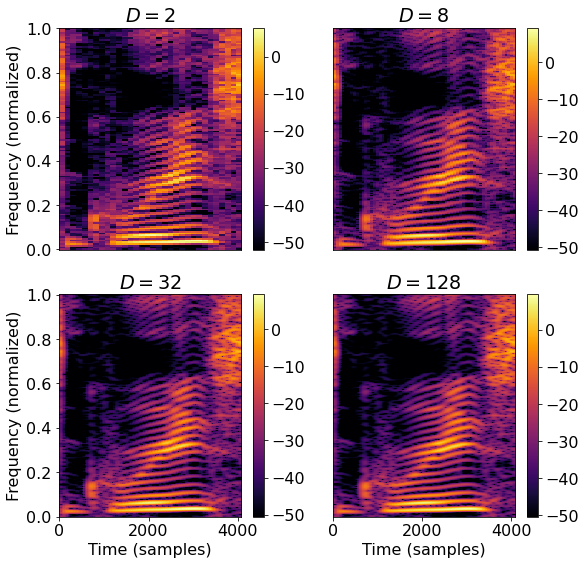

In [6]:
M = 512
a = 64
g = {'name': 'gauss', 'tfr': a*M/L}

dgt_red2 = ltfatpy.dgtreal(signal, g, a*2, int(M/2))[0]
dgt_red8 = ltfatpy.dgtreal(signal, g, a, M)[0]
dgt_red32 = ltfatpy.dgtreal(signal, g, int(a/2), M*2)[0]
dgt_red128 = ltfatpy.dgtreal(signal, g, int(a/4), M*4)[0]


plt.figure(figsize=(9,9));
plt.subplot(221);
ltfatpy.plotdgtreal(dgt_red2, a*2, M/2, dynrange=60);
plt.tick_params(
    axis='x',         
    which='both',   
    bottom=False,
    labelbottom=False)
plt.xlabel('')
plt.title('$D = 2$')

plt.subplot(222);
ltfatpy.plotdgtreal(dgt_red8, a, M, dynrange=60);
plt.tick_params(
    axis='both',         
    which='both',   
    left=False,  
    bottom=False,
    labelleft=False,
    labelbottom=False)
plt.ylabel('')
plt.xlabel('')
plt.title('$D = 8$')

plt.subplot(223);
ltfatpy.plotdgtreal(dgt_red32, a/2, M*2, dynrange=60);
plt.title('$D = 32$')

plt.subplot(224);
ltfatpy.plotdgtreal(dgt_red128, a/4, M*4, dynrange=60);
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
plt.ylabel('')
plt.title('$D = 128$')
plt.savefig("spectrograms_red.pdf", bbox_inches='tight')

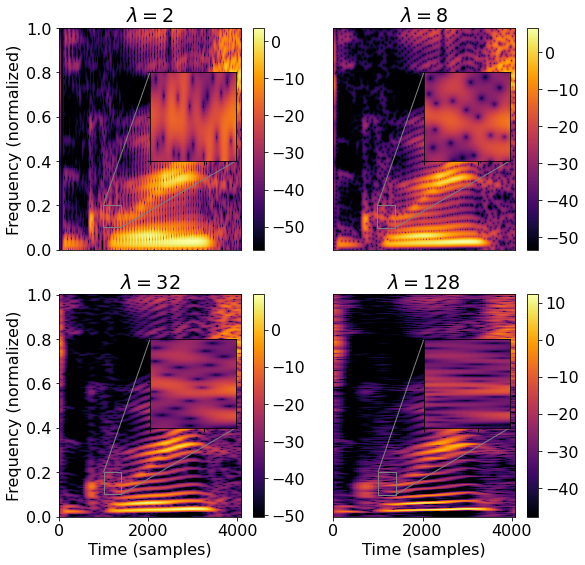

In [128]:
M = 1024
a = 8


dgt_lambda_2 = ltfatpy.dgtreal(signal, {'name': 'gauss', 'tfr': a*M/4/L}, int(a/2), int(M/2))[0]
dgt_lambda_8 = ltfatpy.dgtreal(signal, {'name': 'gauss', 'tfr': a*M/L}, a, M)[0]
dgt_lambda_32 = ltfatpy.dgtreal(signal, {'name': 'gauss', 'tfr': a*M*4/L}, a*2, M*2)[0]
dgt_lambda_128 = ltfatpy.dgtreal(signal, {'name': 'gauss', 'tfr': a*M*16/L}, a*4, M*4)[0]
extent = [0, 4200, 0, 1]

plt.figure(figsize=(9,9));
ax = plt.subplot(221);
ltfatpy.plotdgtreal(dgt_lambda_2, a/2, M/2, dynrange=60);
plt.tick_params(
    axis='x',         
    which='both',   
    bottom=False,
    labelbottom=False)
plt.xlabel('')
plt.title('$\lambda = 2$')

coef = 20. * np.log10(np.abs(dgt_lambda_2) + np.finfo(np.float64).tiny)
maxclim = np.nanmax(coef)
clim = (maxclim - 60, maxclim)
np.clip(coef, clim[0], clim[1], out=coef)

axins = ax.inset_axes([0.5, 0.4, 0.47, .4])
axins.imshow(coef, extent=extent,
          origin="lower", clim=clim)
# sub region of the original image
x1, x2, y1, y2 = 1000, 1400, .1, .2
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')
axins.set_aspect('auto')
ax.indicate_inset_zoom(axins, alpha=1)

ax = plt.subplot(222);
ltfatpy.plotdgtreal(dgt_lambda_8, a, M, dynrange=60);
plt.tick_params(
    axis='both',         
    which='both',   
    left=False,  
    bottom=False,
    labelleft=False,
    labelbottom=False)
plt.ylabel('')
plt.xlabel('')
plt.title('$\lambda = 8$')

coef = 20. * np.log10(np.abs(dgt_lambda_8) + np.finfo(np.float64).tiny)
maxclim = np.nanmax(coef)
clim = (maxclim - 60, maxclim)
np.clip(coef, clim[0], clim[1], out=coef)

axins = ax.inset_axes([0.5, 0.4, 0.47, .4])
axins.imshow(coef, extent=extent,
          origin="lower", clim=clim)
# sub region of the original image
x1, x2, y1, y2 = 1000, 1400, .1, .2
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')
axins.set_aspect('auto')
ax.indicate_inset_zoom(axins, alpha=1)

ax = plt.subplot(223);
ltfatpy.plotdgtreal(dgt_lambda_32, a*2, M*2, dynrange=60);
plt.title('$\lambda = 32$')

coef = 20. * np.log10(np.abs(dgt_lambda_32) + np.finfo(np.float64).tiny)
maxclim = np.nanmax(coef)
clim = (maxclim - 60, maxclim)
np.clip(coef, clim[0], clim[1], out=coef)

axins = ax.inset_axes([0.5, 0.4, 0.47, .4])
axins.imshow(coef, extent=extent,
          origin="lower", clim=clim)
# sub region of the original image
x1, x2, y1, y2 = 1000, 1400, .1, .2
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')
axins.set_aspect('auto')
ax.indicate_inset_zoom(axins, alpha=1)

ax = plt.subplot(224);
ltfatpy.plotdgtreal(dgt_lambda_128, a*4, M*2, dynrange=60);
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
plt.ylabel('')
plt.title('$\lambda = 128$')

coef = 20. * np.log10(np.abs(dgt_lambda_128) + np.finfo(np.float64).tiny)
maxclim = np.nanmax(coef)
clim = (maxclim - 60, maxclim)
np.clip(coef, clim[0], clim[1], out=coef)

axins = ax.inset_axes([0.5, 0.4, 0.47, .4])
axins.imshow(coef, extent=extent,
          origin="lower", clim=clim)
# sub region of the original image
x1, x2, y1, y2 = 1000, 1400, .1, .2
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')
axins.set_aspect('auto')
ax.indicate_inset_zoom(axins, alpha=1)

plt.savefig("spectrograms_lambda.png", bbox_inches='tight')

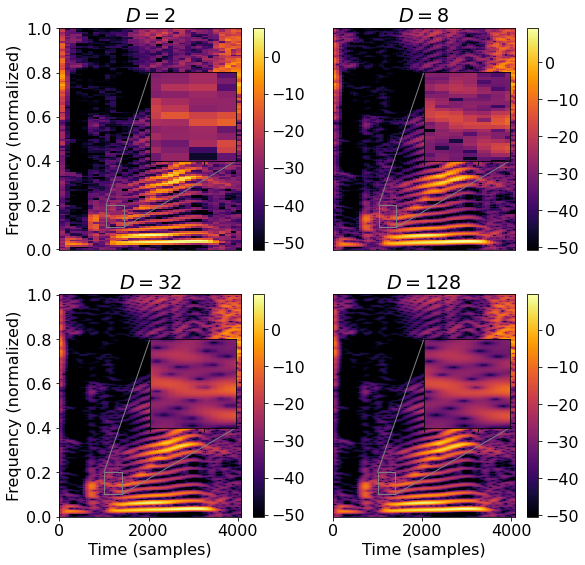

In [123]:
M = 512
a = 64
g = {'name': 'gauss', 'tfr': a*M/L}

dgt_red2 = ltfatpy.dgtreal(signal, g, a*2, int(M/2))[0]
dgt_red8 = ltfatpy.dgtreal(signal, g, a, M)[0]
dgt_red32 = ltfatpy.dgtreal(signal, g, int(a/2), M*2)[0]
dgt_red128 = ltfatpy.dgtreal(signal, g, int(a/4), M*4)[0]
extent = [0, 4200, 0, 1]

plt.figure(figsize=(9,9));
ax = plt.subplot(221);
ltfatpy.plotdgtreal(dgt_red2, a*2, M/2, dynrange=60);
plt.tick_params(
    axis='x',         
    which='both',   
    bottom=False,
    labelbottom=False)
plt.xlabel('')
plt.title('$D = 2$')

coef = 20. * np.log10(np.abs(dgt_red2) + np.finfo(np.float64).tiny)
maxclim = np.nanmax(coef)
clim = (maxclim - 60, maxclim)
np.clip(coef, clim[0], clim[1], out=coef)

axins = ax.inset_axes([0.5, 0.4, 0.47, .4])
axins.imshow(coef, extent=extent,
          origin="lower", clim=clim)
# sub region of the original image
x1, x2, y1, y2 = 1000, 1400, .1, .2
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')
axins.set_aspect('auto')

ax.indicate_inset_zoom(axins, alpha=1)

ax = plt.subplot(222);
image = ltfatpy.plotdgtreal(dgt_red8, a, M, dynrange=60);
plt.tick_params(
    axis='both',         
    which='both',   
    left=False,  
    bottom=False,
    labelleft=False,
    labelbottom=False)
plt.ylabel('')
plt.xlabel('')
plt.title('$D = 8$')

coef = 20. * np.log10(np.abs(dgt_red8) + np.finfo(np.float64).tiny)
maxclim = np.nanmax(coef)
clim = (maxclim - 60, maxclim)
np.clip(coef, clim[0], clim[1], out=coef)

axins = ax.inset_axes([0.5, 0.4, 0.47, .4])

axins.imshow(coef, extent=extent,
          origin="lower",  clim=clim)
# sub region of the original image
x1, x2, y1, y2 = 1000, 1400, .1, .2
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')
axins.set_aspect('auto')

ax.indicate_inset_zoom(axins, alpha=1)

ax = plt.subplot(223);
ltfatpy.plotdgtreal(dgt_red32, a/2, M*2, dynrange=60);
plt.title('$D = 32$')

coef = 20. * np.log10(np.abs(dgt_red32) + np.finfo(np.float64).tiny)
maxclim = np.nanmax(coef)
clim = (maxclim - 60, maxclim)
np.clip(coef, clim[0], clim[1], out=coef)

axins = ax.inset_axes([0.5, 0.4, 0.47, .4])

axins.imshow(coef, extent=extent,
          origin="lower",  clim=clim)
# sub region of the original image
x1, x2, y1, y2 = 1000, 1400, .1, .2
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')
axins.set_aspect('auto')

ax.indicate_inset_zoom(axins, alpha=1)

ax = plt.subplot(224);
ltfatpy.plotdgtreal(dgt_red128, a/4, M*4, dynrange=60);
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
plt.ylabel('')
plt.title('$D = 128$')


axins = ax.inset_axes([0.5, 0.4, 0.47, .4])

coef = 20. * np.log10(np.abs(dgt_red128) + np.finfo(np.float64).tiny)
maxclim = np.nanmax(coef)
clim = (maxclim - 60, maxclim)
np.clip(coef, clim[0], clim[1], out=coef)

axins.imshow(coef, extent=extent,
          origin="lower", clim=clim)
# sub region of the original image
x1, x2, y1, y2 = 1000, 1400, .1, .2

axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')
axins.set_aspect('auto')

ax.indicate_inset_zoom(axins, alpha=1);

plt.savefig("spectrograms_red.pdf", bbox_inches='tight')